In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [5]:
# 加载数据集
def load_data(file_path):
    """
    加载CSV文件并去除最后一列（无用列）。
    返回特征和标签。
    """
    data = pd.read_csv(file_path)
    data = data.iloc[:, :-1]  # 删除最后一列
    features = data.iloc[:, :-1]  # 提取特征
    labels = data.iloc[:, -1]    # 提取标签（倒数第二列为角度）
    return features, labels

# 数据标准化
def standardize_data(features):
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    return features_scaled

In [7]:
# 深度学习模型构建
def build_deep_learning_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # 回归输出层
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse', 'mae'])
    return model

# 训练深度学习模型
def train_deep_learning_model(features_train, labels_train, features_val, labels_val, epochs=50, batch_size=32):
    model = build_deep_learning_model(features_train.shape[1])
    history = model.fit(features_train, labels_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(features_val, labels_val), verbose=1)
    return model, history

In [9]:
# 学习曲线绘制
def plot_learning_curve(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['mse'], label='Training MSE', color='blue')
    plt.plot(history.history['val_mse'], label='Validation MSE', color='green')
    plt.title('Learning Curve (MSE)')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid()
    plt.show()

In [11]:
# 评估模型
def evaluate_model(model, features, labels):
    predictions = model.predict(features).flatten()
    mse = mean_squared_error(labels, predictions)
    r2 = r2_score(labels, predictions)
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R2) Score: {r2:.4f}")
    return predictions

# 绘制混淆矩阵
def plot_confusion_matrix(labels, predictions):
    labels_discrete = np.round(labels / 5) * 5
    predictions_discrete = np.round(predictions / 5) * 5
    cm = confusion_matrix(labels_discrete, predictions_discrete)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Blues', interpolation='nearest')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Angle')
    plt.ylabel('True Angle')
    plt.colorbar()
    plt.show()

    accuracy = accuracy_score(labels_discrete, predictions_discrete)
    precision = precision_score(labels_discrete, predictions_discrete, average='weighted')
    recall = recall_score(labels_discrete, predictions_discrete, average='weighted')
    f1 = f1_score(labels_discrete, predictions_discrete, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [13]:
# 加载训练集、验证集和测试集
train_file_path = '../csv/Cs137_Dataset_rebin/dataset_Cs137_rebin_17_380_acc_training_data.csv'
val_file_path = '../csv/Cs137_Dataset_rebin/dataset_Cs137_rebin_17_380_acc_validation_data.csv'
test_file_path = '../csv/Cs137_Dataset_rebin/dataset_Cs137_rebin_17_380_acc_testing_data.csv'

features_train, labels_train = load_data(train_file_path)
features_val, labels_val = load_data(val_file_path)
features_test, labels_test = load_data(test_file_path)

features_train_scaled = standardize_data(features_train)
features_val_scaled = standardize_data(features_val)
features_test_scaled = standardize_data(features_test)

D:\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Epoch 1/50


D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 12619.6914 - mae: 85.0856 - mse: 12619.6914 - val_loss: 5741.5083 - val_mae: 57.3548 - val_mse: 5741.5083
Epoch 2/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5639.5527 - mae: 56.5929 - mse: 5639.5527 - val_loss: 5530.7896 - val_mae: 55.4676 - val_mse: 5530.7896
Epoch 3/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 5187.2783 - mae: 53.9046 - mse: 5187.2783 - val_loss: 4514.4990 - val_mae: 49.6621 - val_mse: 4514.4990
Epoch 4/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4406.5874 - mae: 49.0681 - mse: 4406.5874 - val_loss: 4160.9927 - val_mae: 47.7139 - val_mse: 4160.9927
Epoch 5/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4222.0996 - mae: 48.1721 - mse: 4222.0996 - val_loss: 3924.4128 - val_mae: 46.8080 - val_mse: 3924.4128
Epoch 6/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3994.9607 - mae: 47.1281 - mse: 3994.9607 - val_loss: 3862.6855 - val_mae: 46.2385 - val_mse: 3862.6855
Epoch 7/50
14

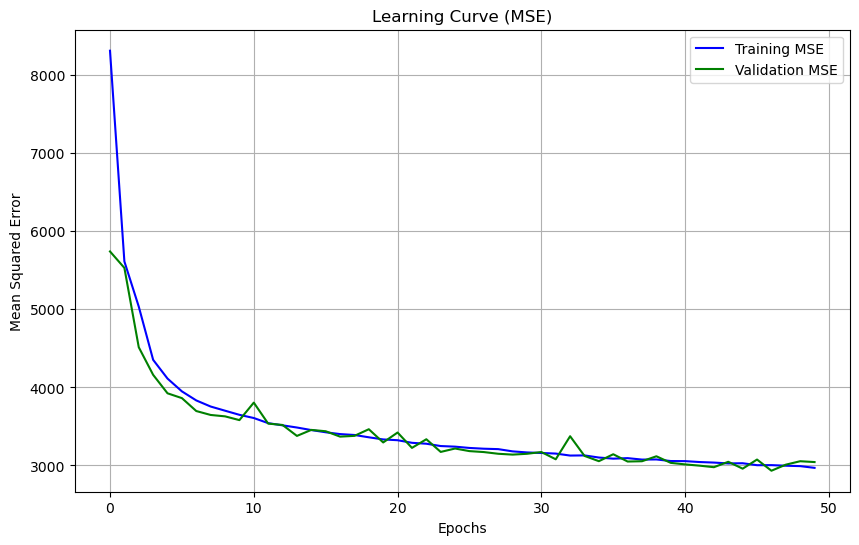

575/575 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
Mean Squared Error (MSE): 3062.9865
R-squared (R2) Score: 0.7112


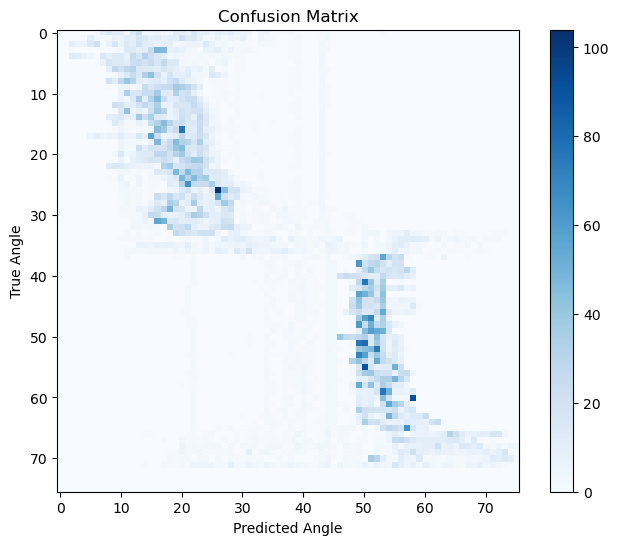

Accuracy: 0.0503
Precision: 0.0609
Recall: 0.0503
F1 Score: 0.0419


D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# UMAP降维
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding_train = umap_reducer.fit_transform(features_train_scaled)
embedding_val = umap_reducer.transform(features_val_scaled)
embedding_test = umap_reducer.transform(features_test_scaled)

# 训练深度学习模型（UMAP降维特征）
model, history = train_deep_learning_model(embedding_train, labels_train, embedding_val, labels_val)
plot_learning_curve(history)
predictions = evaluate_model(model, embedding_test, labels_test)
plot_confusion_matrix(labels_test, predictions)

Epoch 1/50


D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 9734.0615 - mae: 66.5030 - mse: 9734.0615 - val_loss: 1173.7875 - val_mae: 20.1642 - val_mse: 1173.7875
Epoch 2/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 919.9968 - mae: 17.3801 - mse: 919.9968 - val_loss: 535.0416 - val_mae: 11.9622 - val_mse: 535.0416
Epoch 3/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 570.1380 - mae: 12.5927 - mse: 570.1380 - val_loss: 461.0461 - val_mae: 11.2136 - val_mse: 461.0461
Epoch 4/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 427.9691 - mae: 10.8739 - mse: 427.9691 - val_loss: 322.1087 - val_mae: 9.2586 - val_mse: 322.1087
Epoch 5/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 372.2419 - mae: 9.8085 - mse: 372.2419 - val_loss: 317.6527 - val_mae: 9.1453 - val_mse: 317.6527
Epoch 6/50
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 308.1131 - mae: 8.8830 - mse: 308.1131 - val_loss: 347.9629 - val_mae: 9.1187 - val_mse: 347.9629
Epoch 7/50
1438/1438 ━━━━━━━━━━━━━━━━━━━

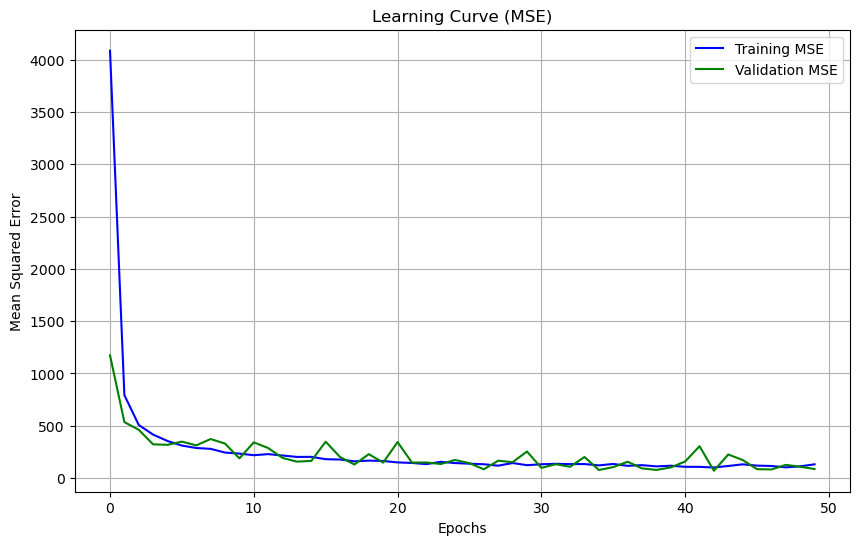

575/575 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
Mean Squared Error (MSE): 104.5341
R-squared (R2) Score: 0.9901


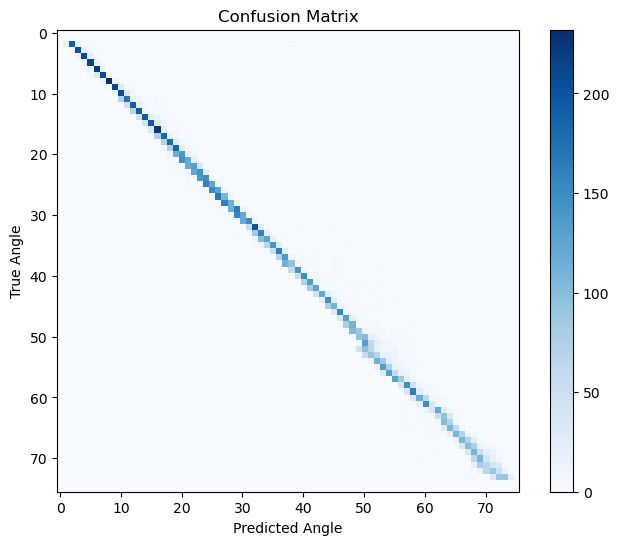

Accuracy: 0.4832
Precision: 0.4918
Recall: 0.4832
F1 Score: 0.4836


D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# PCA降维
pca = PCA(n_components=50)
pca_embedding_train = pca.fit_transform(features_train_scaled)
pca_embedding_val = pca.transform(features_val_scaled)
pca_embedding_test = pca.transform(features_test_scaled)

# 训练深度学习模型（PCA降维特征）
model, history = train_deep_learning_model(pca_embedding_train, labels_train, pca_embedding_val, labels_val)
plot_learning_curve(history)
predictions = evaluate_model(model, pca_embedding_test, labels_test)
plot_confusion_matrix(labels_test, predictions)